In [47]:
# !pip install yfinance
# !pip install numpy==1.26.4
# !pip install pmdarima

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from datetime import date, timedelta

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, pacf
from statsmodels.tsa.stattools import acf, pacf, adfuller

In [49]:
today = date.today()
end_date = today.strftime("%Y-%m-%d")
start_date = (today - timedelta(days=1000)).strftime("%Y-%m-%d")

data = yf.download('AAPL', start=start_date, end=end_date, progress=False)

/tmp/ipython-input-49-153914296.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start=start_date, end=end_date, progress=False)


In [50]:
data['Date'] = data.index
data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        685 non-null    datetime64[ns]
 1   (Open, AAPL)    685 non-null    float64       
 2   (High, AAPL)    685 non-null    float64       
 3   (Low, AAPL)     685 non-null    float64       
 4   (Close, AAPL)   685 non-null    float64       
 5   (Volume, AAPL)  685 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 32.2 KB


In [51]:
df = data[['Date', 'Close']]
df.head()

Price,Date,Close
Ticker,,AAPL
0,2022-10-31,151.128403
1,2022-11-01,148.477173
2,2022-11-02,142.938248
3,2022-11-03,136.876953
4,2022-11-04,136.610428


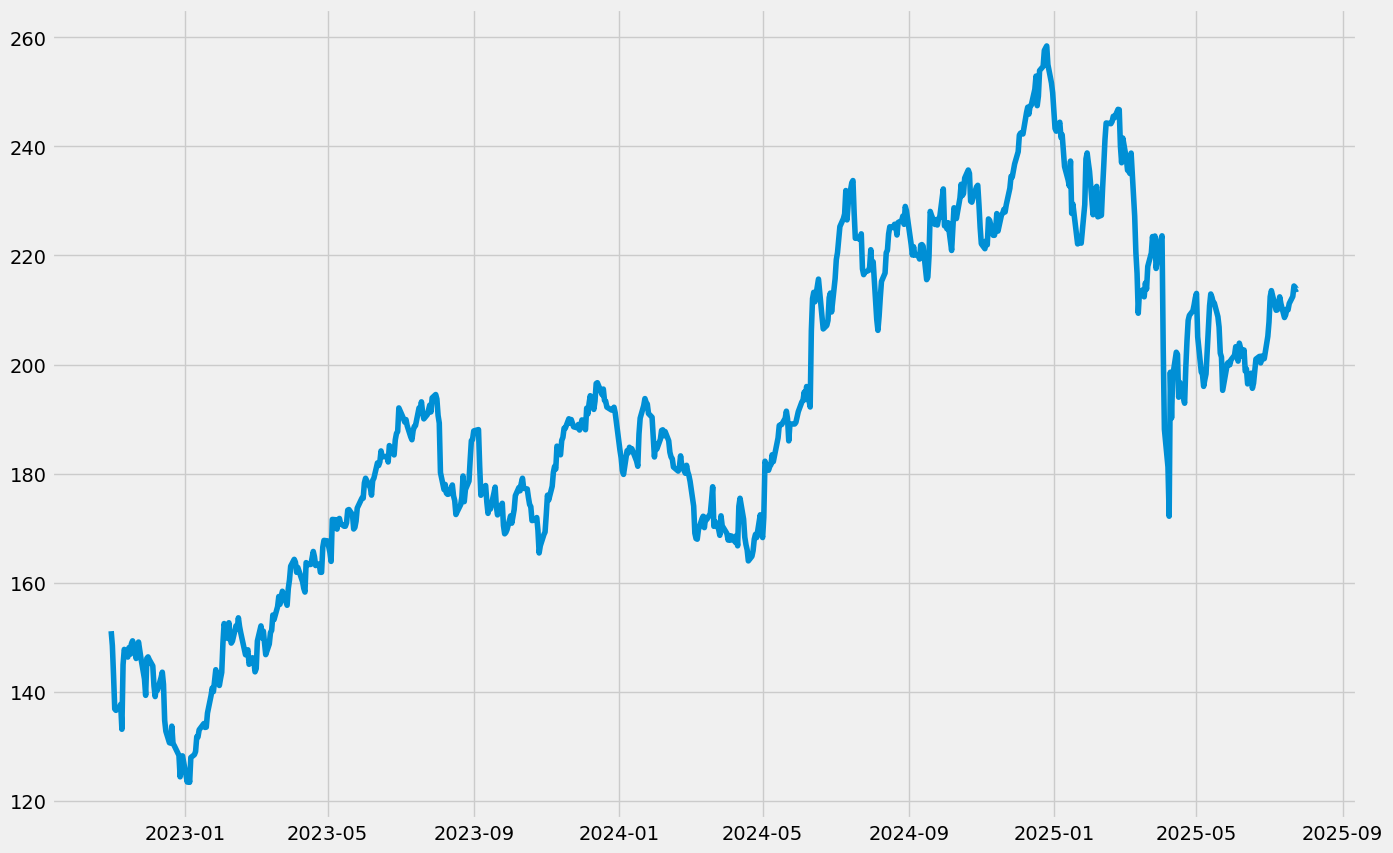

In [52]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(df['Date'], df['Close'])

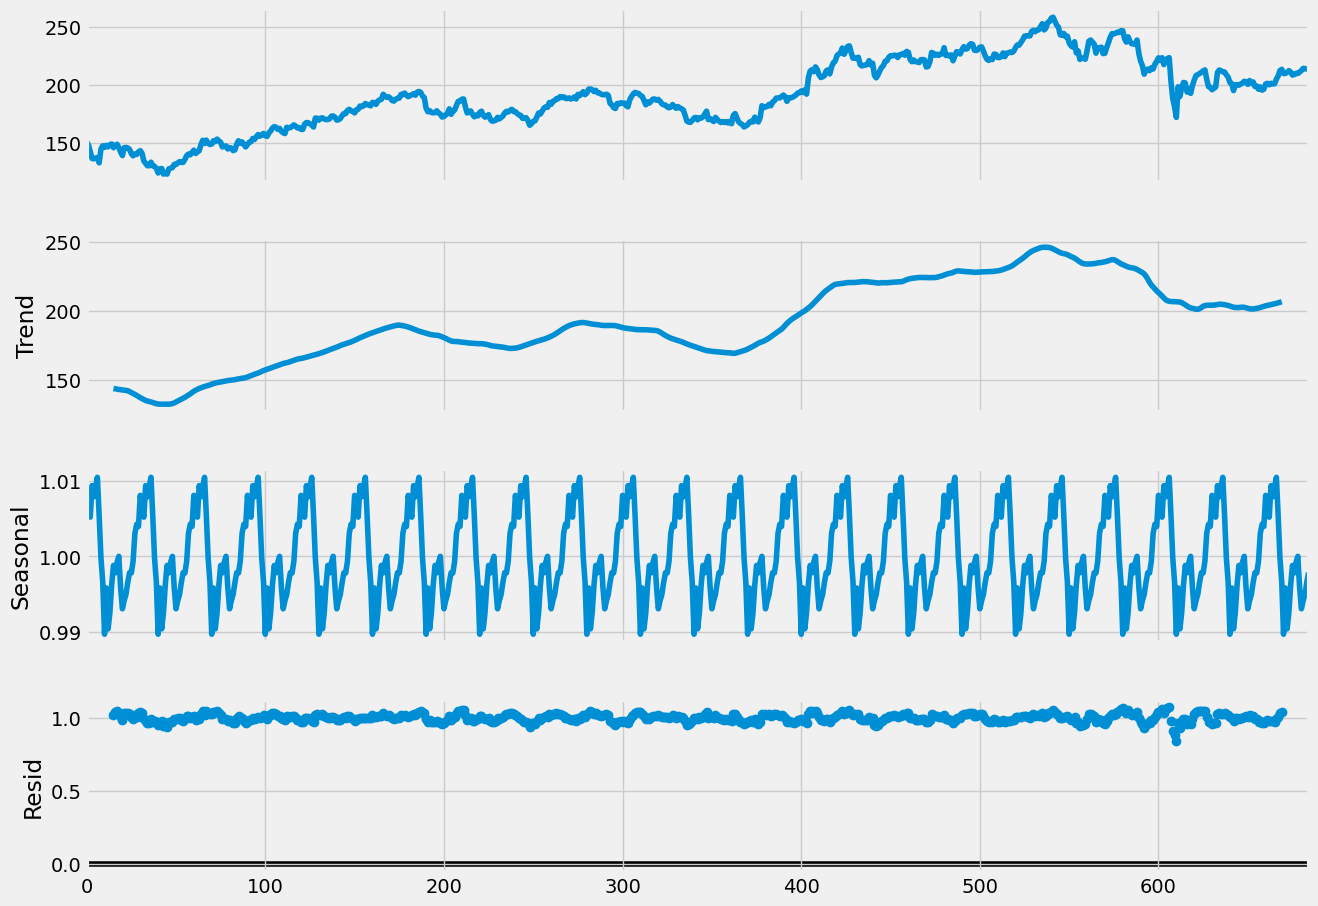

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='multiplicative', period=30)
fig = plt.Figure()
fig = result.plot()
fig.set_size_inches(15, 10)

In [54]:
# create test
stationery_test_result = adfuller(df['Close'])
stationery_test_result

(-1.822826311156185,
 0.3691893886128204,
 4,
 680,
 {'1%': -3.4400031721739515,
  '5%': -2.865799725091594,
  '10%': -2.569038427768166},
 3428.399801786859)

In [55]:
print(f"ADF Statistic: {stationery_test_result[0]}")
print(f"p-value: {stationery_test_result[1]}")
print("Critical Values:")
for k,v in stationery_test_result[4].items():
    print(f"Key: {k} | Value: {v}")

print()
print("Stationer" if stationery_test_result[0] < stationery_test_result[4]['5%'] else "Non-Stationer")
print("Stationer" if stationery_test_result[1] < 0.05 else "Non-Stationer")

ADF Statistic: -1.822826311156185
p-value: 0.3691893886128204
Critical Values:
Key: 1% | Value: -3.4400031721739515
Key: 5% | Value: -2.865799725091594
Key: 10% | Value: -2.569038427768166

Non-Stationer
Non-Stationer


<Figure size 1000x500 with 0 Axes>

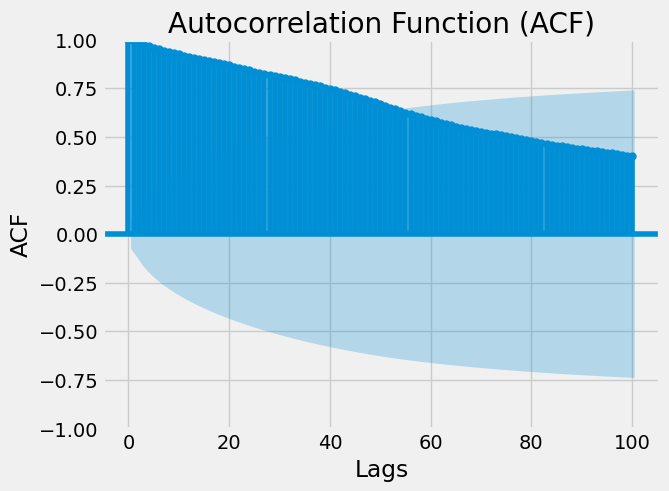

In [56]:
# plot acf lag 0 - 100
plt.figure(figsize=(10, 5))
plot_acf(df['Close'], lags=100)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.grid(True)

Autocorrelation Function (ACF) values:
Lag: 0: 1.0
Lag: 1: 0.992727616091988
Lag: 2: 0.9847363321210851
Lag: 3: 0.9756655952061583
Lag: 4: 0.9668765031324522
Lag: 5: 0.9588798174588986
Lag: 6: 0.9516705671231652
Lag: 7: 0.9445421675253102
Lag: 8: 0.9375900852744731
Lag: 9: 0.9312611473178953
Lag: 10: 0.9247697360135516
Lag: 11: 0.9186011074077656
Lag: 12: 0.912649268398323
Lag: 13: 0.9069478411321602
Lag: 14: 0.9007400865224113
Lag: 15: 0.8949643503461617
Lag: 16: 0.8885668859478169
Lag: 17: 0.8833359866622201
Lag: 18: 0.87865980719405
Lag: 19: 0.8733906707011695
Lag: 20: 0.8680045312528658



<Figure size 1000x500 with 0 Axes>

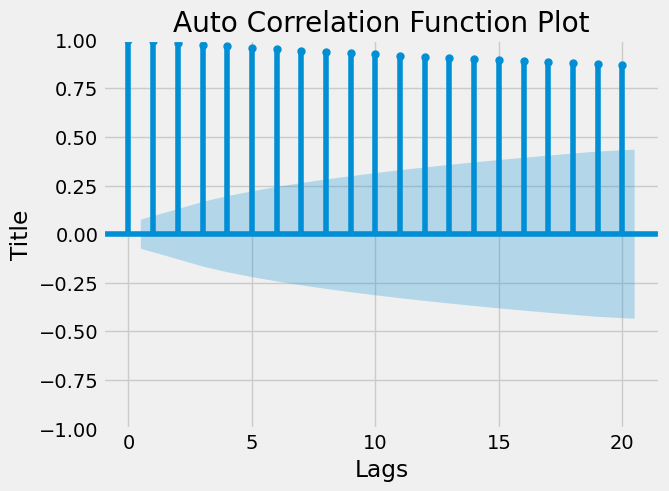

In [57]:
acf_values = acf(df['Close'], nlags=20)

# Print ACF Values
print("Autocorrelation Function (ACF) values:")
for lag, acf_val in enumerate(acf_values):
    print(f"Lag: {lag}: {acf_val}")

print()

plt.figure(figsize=(10, 5))
plot_acf(df['Close'], lags=20)
plt.title("Auto Correlation Function Plot")
plt.xlabel("Lags")
plt.ylabel("Title")
plt.show()

Partial Autocorrelation Function (PACF) values:
Lag 0: 1.0
Lag 1: 0.9941789722558653
Lag 2: -0.0664992799034687
Lag 3: -0.09475566116777699
Lag 4: 0.030186345317711808
Lag 5: 0.06949513808811783
Lag 6: 0.05093053759677331
Lag 7: -0.017420640005059863
Lag 8: 0.0029743002912503034
Lag 9: 0.05863479764248888
Lag 10: -0.018516962301969704
Lag 11: 0.018489159088263225
Lag 12: 0.01914829839670573
Lag 13: 0.020136810956449137
Lag 14: -0.049997419995516074
Lag 15: 0.037756363193454254
Lag 16: -0.046981096890864604
Lag 17: 0.10657023380725923
Lag 18: 0.04057581841236884
Lag 19: -0.08383540878312483
Lag 20: -0.010620851151050312



<Figure size 1000x500 with 0 Axes>

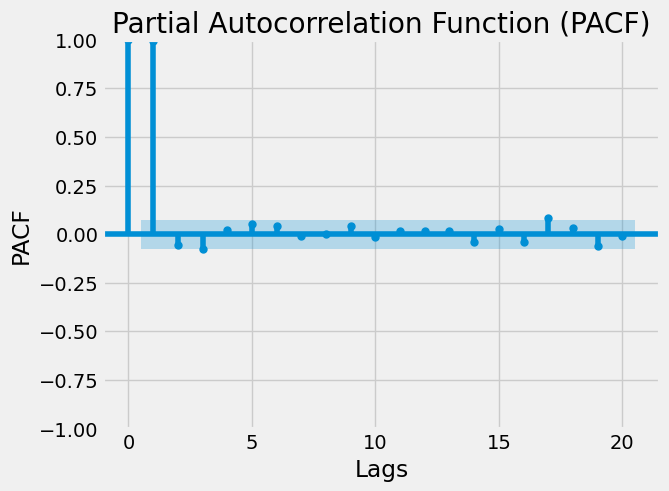

In [58]:
pacf_values = pacf(df['Close'], nlags=20)

# Print PACF values
print("Partial Autocorrelation Function (PACF) values:")
for lag, pacf_val in enumerate(pacf_values):
    print(f"Lag {lag}: {pacf_val}")

print()

# Plot PACF
plt.figure(figsize=(10, 5))
plot_pacf(df['Close'], lags=20)  # Change lags according to your data
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.grid(True)
plt.show()

/tmp/ipython-input-59-4101041577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_1'] = df['Close'].diff().dropna()


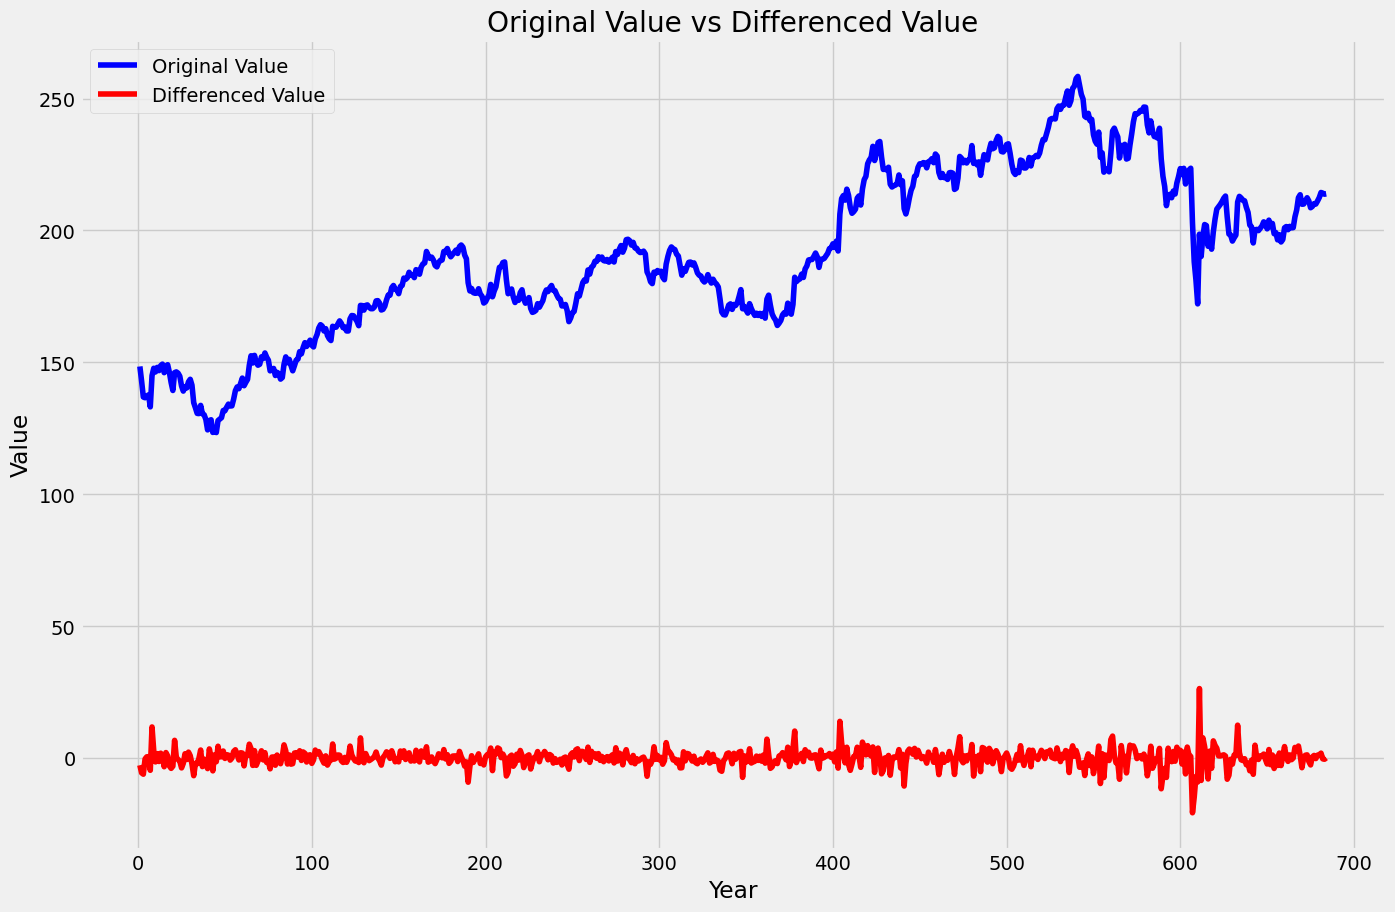

In [59]:
df['diff_1'] = df['Close'].diff().dropna()
df = df.dropna()

plt.figure(figsize=(15,10))
plt.plot(df['Close'], label='Original Value', color='blue')
plt.plot(df['diff_1'], label='Differenced Value', color='red')
plt.title("Original Value vs Differenced Value")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.show()

In [60]:
stationery_test_result = adfuller(df['diff_1'])

print(f"ADF Statistic: {stationery_test_result[0]}")
print(f"p-value: {stationery_test_result[1]}")
print("Critical Values:")
for k,v in stationery_test_result[4].items():
    print(f"Key: {k} | Value: {v}")

print()
print("Stationer" if stationery_test_result[0] < stationery_test_result[4]['5%'] else "Non-Stationer")
print("Stationer" if stationery_test_result[1] < 0.05 else "Non-Stationer")

ADF Statistic: -14.077618384780129
p-value: 2.8661376399438436e-26
Critical Values:
Key: 1% | Value: -3.4400031721739515
Key: 5% | Value: -2.865799725091594
Key: 10% | Value: -2.569038427768166

Stationer
Stationer


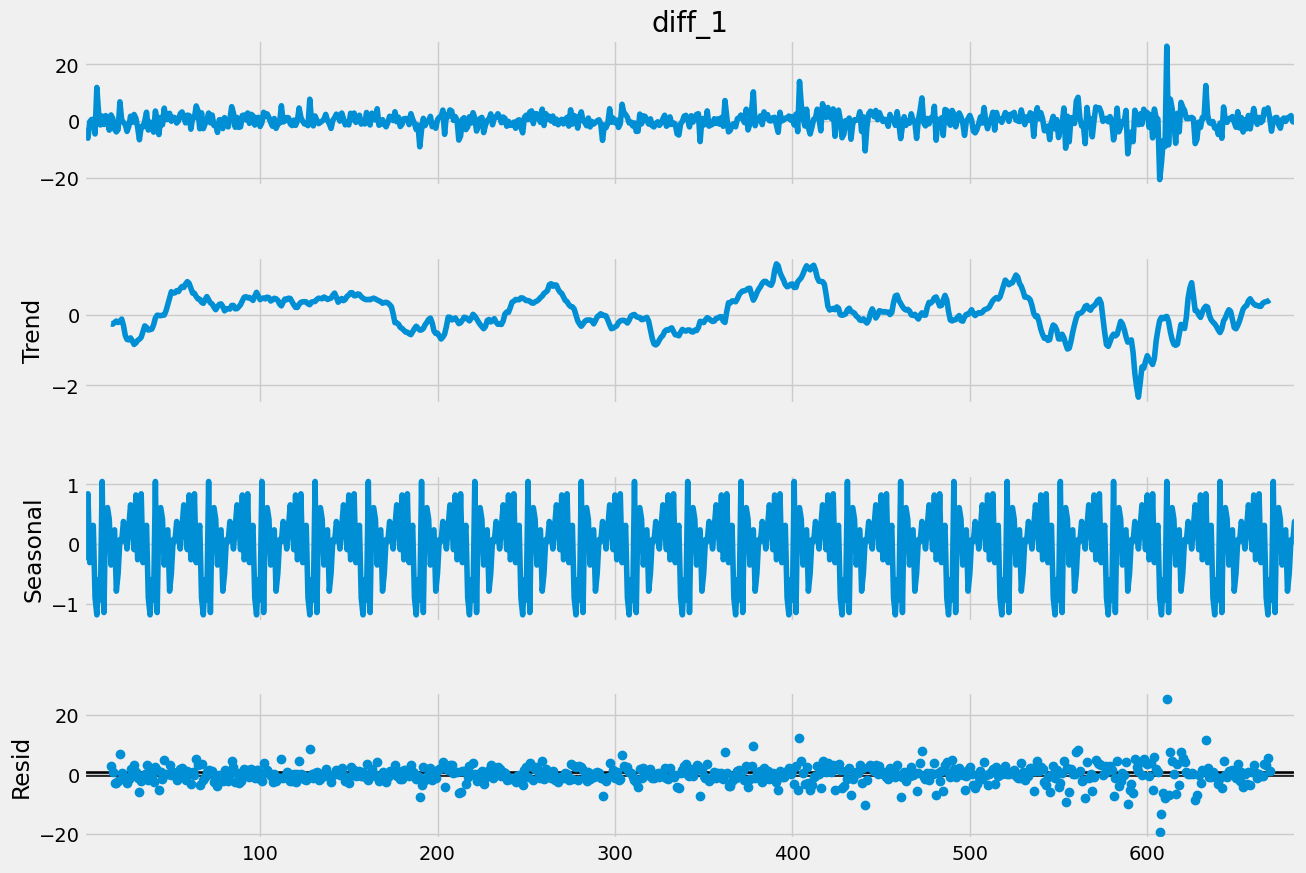

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['diff_1'], model='additive', period=30)
fig = plt.Figure()
fig = result.plot()
fig.set_size_inches(15, 10)

Autocorrelation Function (ACF) values:
Lag: 0: 1.0
Lag: 1: 0.9925401573415658
Lag: 2: 0.9841769207845538
Lag: 3: 0.9746980293814741
Lag: 4: 0.9658670258375233
Lag: 5: 0.9578807413465925
Lag: 6: 0.9506863070411178
Lag: 7: 0.9432479594244015
Lag: 8: 0.9370230787320785
Lag: 9: 0.9308520353440505
Lag: 10: 0.9242532720083071
Lag: 11: 0.9181765306598042
Lag: 12: 0.9121296820668072
Lag: 13: 0.9065319695748325
Lag: 14: 0.9003419065917606
Lag: 15: 0.8943448962475071
Lag: 16: 0.8880645057927445
Lag: 17: 0.88287389793736
Lag: 18: 0.8779989637547148
Lag: 19: 0.8724710615811823
Lag: 20: 0.8668775150719552



<Figure size 1000x500 with 0 Axes>

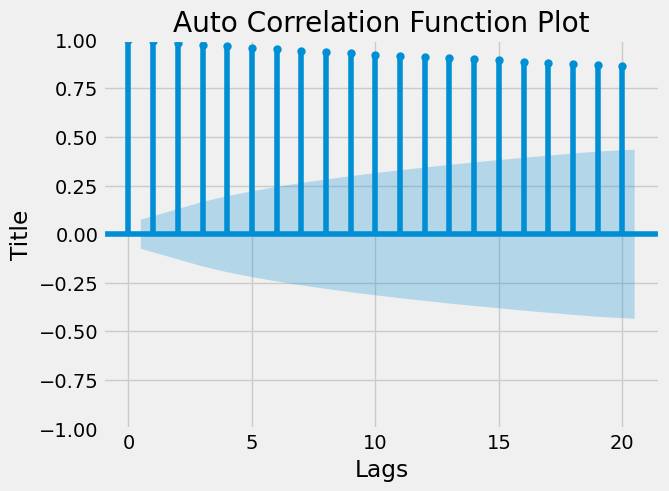

In [62]:
acf_values = acf(df['Close'], nlags=20)

# Print ACF Values
print("Autocorrelation Function (ACF) values:")
for lag, acf_val in enumerate(acf_values):
    print(f"Lag: {lag}: {acf_val}")

print()

plt.figure(figsize=(10, 5))
plot_acf(df['Close'], lags=20)
plt.title("Auto Correlation Function Plot")
plt.xlabel("Lags")
plt.ylabel("Title")
plt.show()

Partial Autocorrelation Function (PACF) values:
Lag 0: 1.0
Lag 1: 0.9939933640141011
Lag 2: -0.08013043190660278
Lag 3: -0.093432461121221
Lag 4: 0.06277963101525488
Lag 5: 0.06667930664650436
Lag 6: 0.041384098590560414
Lag 7: -0.04407421832707594
Lag 8: 0.10172251884721434
Lag 9: 0.003342297623517235
Lag 10: -0.05882596322865554
Lag 11: 0.05744252668527252
Lag 12: 0.012699924750225694
Lag 13: 0.03127235494125211
Lag 14: -0.07164692375555788
Lag 15: 0.030146979628948013
Lag 16: -0.004693515672489036
Lag 17: 0.07605608246036406
Lag 18: 0.021578468288196075
Lag 19: -0.08733898487932505
Lag 20: 0.015934527153405036



<Figure size 1000x500 with 0 Axes>

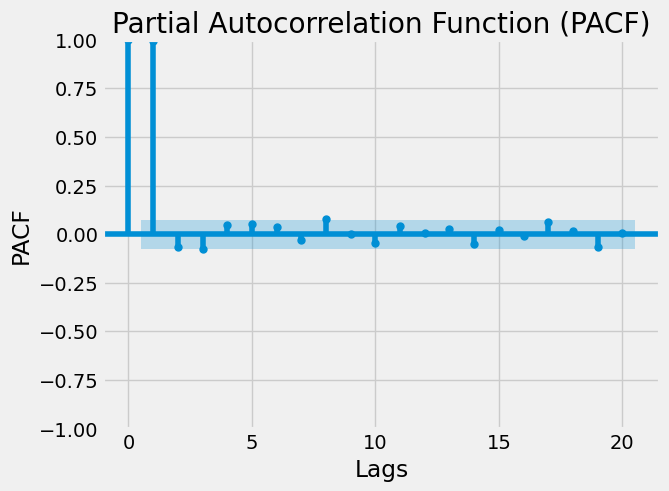

In [63]:
pacf_values = pacf(df['Close'], nlags=20)

# Print PACF values
print("Partial Autocorrelation Function (PACF) values:")
for lag, pacf_val in enumerate(pacf_values):
    print(f"Lag {lag}: {pacf_val}")

print()

# Plot PACF
plt.figure(figsize=(10, 5))
plot_pacf(df['Close'], lags=20)  # Change lags according to your data
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.grid(True)
plt.show()

In [64]:
p,d,q = 1,1,5

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['diff_1'], order=(p,d,q))
fitted = model.fit()
fitted.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 diff_1   No. Observations:                  684
Model:                 ARIMA(1, 1, 5)   Log Likelihood               -1769.758
Date:                Sat, 26 Jul 2025   AIC                           3553.515
Time:                        08:09:12   BIC                           3585.201
Sample:                             0   HQIC                          3565.777
                                - 684                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9518      0.570     -1.670      0.095      -2.069       0.165
ma.L1         -0.0023      0.566     -0.004      0.997      -1.112       1.108
ma.L2         -0.8816      0.547     -1.613      0.107      -1.953       0.190
ma.L3         -0.0913      0.040     -2.281      0.023      -0.170      -0.013
ma.L4         -0.0683      0.071     -0.962      0.336      -0.208       0.071
ma.L5          0.0448      0.035      1.287      0.198      -0.023       0.113
sigma2        10.3361      0.397     26.064      0.000       9.559      11.113
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3121.48
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.76   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
predictions = fitted.predict()
predictions

,predicted_mean
1,0.000000
2,-2.651203
3,-4.058955
4,-4.976443
5,-3.450003
...,...
680,0.076515
681,0.216967
682,0.232593
683,0.110522


In [66]:
# for q in range(1, 16):
#     model = ARIMA(df['diff_1'], order=(1,1,q))
#     result = model.fit()
#     print(f'q={q}, AIC={result.aic}')

In [67]:
import statsmodels.api as sm
p,d,q = 1,0,5
P,D,Q,s = 0,0,0,12

model = sm.tsa.statespace.SARIMAX(df['diff_1'], order=(p,d,q), seasonal_order=(P,D,Q,12))
fitted = model.fit()
fitted.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 diff_1   No. Observations:                  684
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -1766.156
Date:                Sat, 26 Jul 2025   AIC                           3546.312
Time:                        08:09:12   BIC                           3578.008
Sample:                             0   HQIC                          3558.578
                                - 684                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5062      0.381     -1.327      0.185      -1.254       0.242
ma.L1          0.5510      0.381      1.445      0.148      -0.196       1.298
ma.L2          0.0846      0.041      2.046      0.041       0.004       0.166
ma.L3         -0.0327      0.041     -0.804      0.421      -0.112       0.047
ma.L4         -0.0951      0.037     -2.555      0.011      -0.168      -0.022
ma.L5         -0.0866      0.032     -2.677      0.007      -0.150      -0.023
sigma2        10.2390      0.295     34.742      0.000       9.661      10.817
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2456.29
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.71   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
predictions = fitted.predict(len(df), len(df) + 360)
predictions

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
684,-1.422497e-01
685,-1.109985e-02
686,6.057757e-02
687,-3.878388e-02
688,-1.808832e-02
...,...
1040,-1.458004e-106
1041,7.379689e-107
1042,-3.735231e-107
1043,1.890588e-107


In [69]:
from pmdarima import auto_arima

model = auto_arima(df['Close'],
                   seasonal=False,
                   trace=True,
                   suppress_warnings=True,
                   stepwise=True)

model.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3543.573, Time=1.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3542.983, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3543.488, Time=0.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3543.654, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3541.583, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3544.961, Time=0.95 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.612 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  684
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1769.792
Date:                Sat, 26 Jul 2025   AIC                           3541.583
Time:                        08:09:16   BIC                           3546.110
Sample:                             0   HQIC                          3543.335
                                - 684                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        10.4283      0.228     45.767      0.000       9.982      10.875
===================================================================================
Ljung-Box (L1) (Q):                   1.50   Jarque-Bera (JB):              3001.30
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               2.86   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
forecast = model.predict(n_periods=30)
forecast

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,0
684,213.880005
685,213.880005
686,213.880005
687,213.880005
688,213.880005
689,213.880005
690,213.880005
691,213.880005
692,213.880005
693,213.880005


<Axes: >

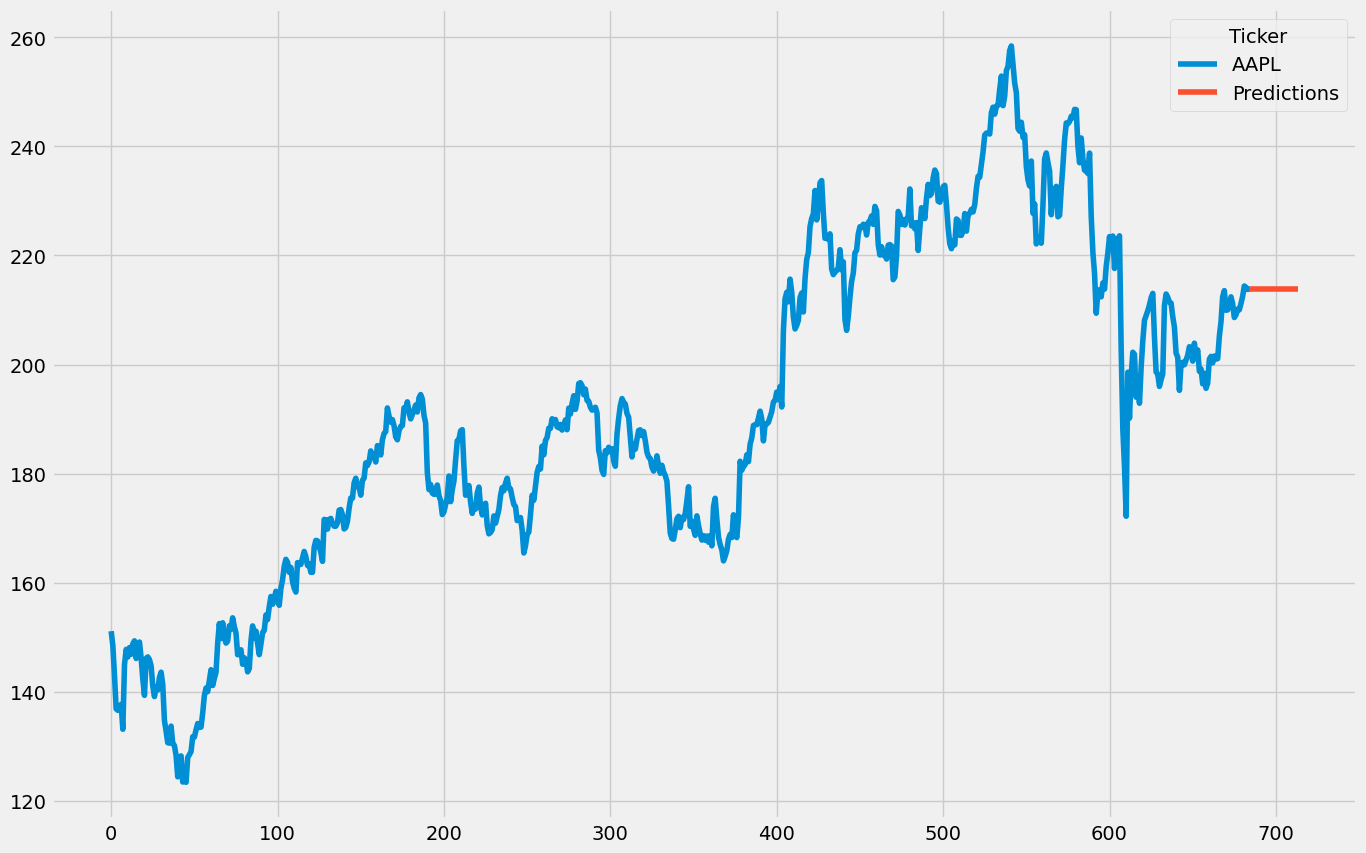

In [71]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
forecast.plot(legend=True, label="Predictions")